# Go-to-Market(G2M) insight for Cab Investment firm

## Introduction

**The Client**

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

**Data Set:**

We have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

**Cab_Data.csv** – This file includes details of transaction for 2 cab companies

**Customer_ID.csv** – This is a mapping table that contains a unique identifier which links the customer’s demographic details

**Transaction_ID.csv** – This is a mapping table that contains transaction to customer mapping and payment mode

**City.csv** – This file contains list of US cities, their population and number of cab users

## To decide which company is a better investment opportunity for XYZ we will try to respond the following questions:

•	Which company has had more profit over the years?

•	Which company has users with better income?

•	Which company has more users by city?

•	Which company has more ride throughout the years?

•	Which company tend to retain more customers?

## Exploratory Data Analysis (EDA)

In [14]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

cab_data = pd.read_csv("Cab_Data.csv")
city = pd.read_csv("City.csv")
custumer = pd.read_csv("Customer_ID.csv")
transaction = pd.read_csv("Transaction_ID.csv")

display(cab_data.head())
display(city.head())
display(custumer.head())
display(transaction.head())

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


**Checking for missing values**

In [15]:
display(cab_data.isna().sum())
display(city.isna().sum())
display(custumer.isna().sum())
display(transaction.isna().sum())

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

City          0
Population    0
Users         0
dtype: int64

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

**Checking for duplicate values**

In [16]:
display(cab_data[cab_data.duplicated()])
display(city[city.duplicated()])
display(custumer[custumer.duplicated()])
display(transaction[transaction.duplicated()])


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip


,City,Population,Users


,Customer ID,Gender,Age,Income (USD/Month)


,Transaction ID,Customer ID,Payment_Mode


Since there are **no missing or duplicate values** in the tables, let's proceed to merge them all to begin the exploration and visualization that we will need for our analysis.

In [17]:
datefromxls = lambda x: datetime.fromordinal(datetime(1900,1,1).toordinal() + x - 2)
cab_data['Date of Travel'] = cab_data['Date of Travel'].apply(datefromxls)

# Merging tables
trans_per_custumer = transaction.merge(custumer, on = 'Customer ID', how = 'left')
cab_city_data = cab_data.merge(city, on = 'City', how = 'left')
data = cab_city_data.merge(trans_per_custumer, on = 'Transaction ID', how = 'left')

# Establish the correct data type for some features
data['Population'] = data['Population'].str.replace(',','').astype('int64')
data['Users'] = data['Users'].str.replace(',','').astype('int64')
data['Payment_Mode'] = data['Payment_Mode'].astype('category')
data['Gender'] = data['Gender'].astype('category')

# Defining new features for our analysis

# Profit
data['Profit'] = data['Price Charged'] - data['Cost of Trip']

# Profit per KM
data['Profit per KM'] = data['Profit'] / data['KM Travelled']

# Age Group
def age_group(age):
    
    age_dict = {0:'18-25', 
                1:'26-40', 
                2:'41-60', 
                3:'60+'}
    
    if (age >= 18 and age <= 25):
        return age_dict[0]
    elif (age > 25 and age <= 40):
        return age_dict[1]
    elif (age > 40 and age <= 60):
        return age_dict[2]
    elif (age > 60):
        return age_dict[3]
    
data['Age Group'] = data['Age'].apply(age_group)
data['Age Group'] = data['Age Group'].astype('category')

# Income Group
def income_group(income):
    
    income_dict = {0:'Poor or near-poor', 
                   1:'Lower-middle class', 
                   2:'Middle class', 
                   3:'Upper-middle class',
                   4:'Rich'}
    
    if (income <= 32048):
        return income_dict[0]
    elif (income > 32048 and income <= 53413):
        return income_dict[1]
    elif (income > 53413 and income <= 106827):
        return income_dict[2]
    elif (income > 106827 and income <= 373894):
        return income_dict[3]
    elif (income > 373894):
        return income_dict[4]
    
# The income grouping was decided with the help of this article:
#https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system

data['Income Group'] = (data['Income (USD/Month)']*12).apply(income_group)
data['Income Group'] = data['Income Group'].astype('category')

display(data.head())
data.info()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Profit per KM,Age Group,Income Group
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,814885,24701,29290,Card,Male,28,10813,57.315,1.882266,26-40,Upper-middle class
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,814885,24701,27703,Card,Male,27,9237,23.666,0.826904,26-40,Upper-middle class
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,814885,24701,28712,Cash,Male,53,11242,27.568,3.049558,41-60,Upper-middle class
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,814885,24701,28020,Cash,Male,23,23327,25.798,0.777751,18-25,Upper-middle class
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,814885,24701,27182,Card,Male,33,8536,16.844,1.929439,26-40,Middle class


<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Population          359392 non-null  int64         
 8   Users               359392 non-null  int64         
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  category      
 11  Gender              359392 non-null  category      
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

## Which company has had more profit over the years?

Text(0.5, 0, 'Years')

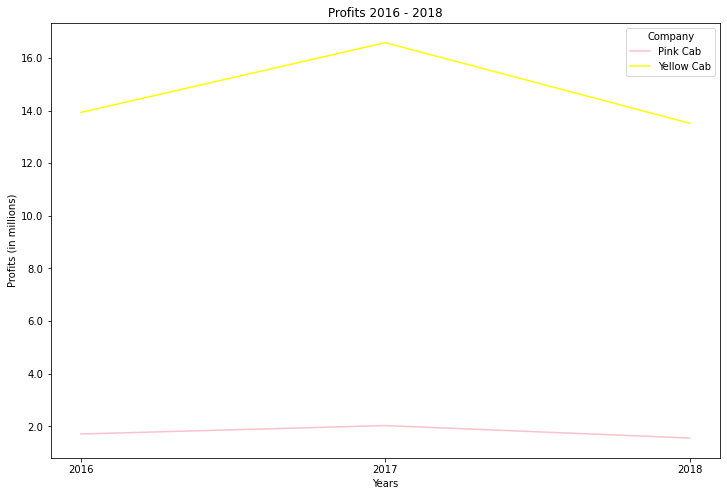

In [18]:
profit_df = data.groupby(['Company',data['Date of Travel'].dt.year])[['Profit']].sum().reset_index()


plt.rcParams['figure.figsize'] = [12, 8]

ax = sns.lineplot(x = 'Date of Travel', y ='Profit', data = profit_df, hue = 'Company', palette = ['pink','yellow'])

from matplotlib.ticker import FuncFormatter

millions_formatter = lambda x, pos: f'{x / 1000000}'

ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_ylabel('Profits (in millions)')
ax.set_xticks(profit_df['Date of Travel'].unique())
ax.set_title('Profits 2016 - 2018')
ax.set_xlabel('Years')


In [19]:
profit_table = data.groupby(['Company']).agg({'Profit':'sum', 'Profit per KM':'mean'}).reset_index()
ratio = profit_table.iloc[1,1] / profit_table.iloc[0,1]
display(ratio)

format = lambda x:"${:.1f}M".format(x/1000000)
profit_table['Profit'] = profit_table['Profit'].apply(format)
display(profit_table)

8.294262293256004

,Company,Profit,Profit per KM
0,Pink Cab,$5.3M,2.769908
1,Yellow Cab,$44.0M,7.105508


Yellow Cab has earned **8.3** times the earnings of Pink Cab

## Which company has users with better income?

,Company,Income Group,Users
0,Pink Cab,Lower-middle class,5971
1,Pink Cab,Middle class,14743
2,Pink Cab,Poor or near-poor,2309
3,Pink Cab,Rich,3018
4,Pink Cab,Upper-middle class,58670
5,Yellow Cab,Lower-middle class,19545
6,Yellow Cab,Middle class,47278
7,Yellow Cab,Poor or near-poor,7258
8,Yellow Cab,Rich,9702
9,Yellow Cab,Upper-middle class,190898


Text(0.5, 1.0, 'Number of Users in each Income Group')

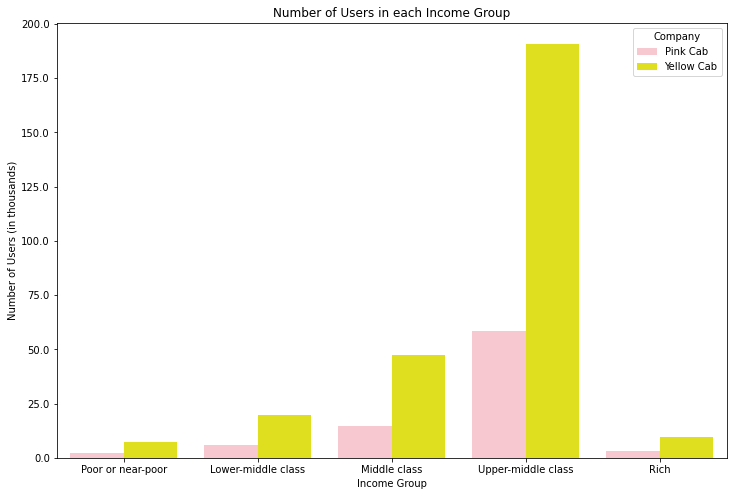

In [20]:
income_group_df = data.groupby(['Company', 'Income Group'])['Users'].count().reset_index()
display(income_group_df)

ax = sns.barplot(x = 'Income Group', y = 'Users', data = income_group_df, hue = 'Company', palette = ['pink','yellow'], order = ['Poor or near-poor','Lower-middle class','Middle class', 'Upper-middle class','Rich'])

thousands_formatter = lambda x, pos: f'{x / 1000}'

ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
ax.set_ylabel('Number of Users (in thousands)')
ax.set_title('Number of Users in each Income Group')

In each economic group Yellow Cab has more users than Pink Cab

## Which company has more users by city?

Text(0.5, 1.0, 'Quantity of Users by City')

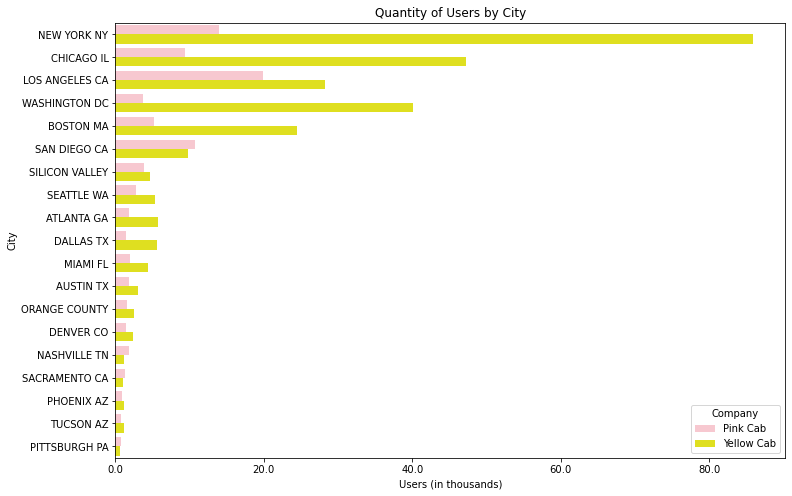

In [21]:
city_group_df = data.groupby(['Company', 'City'])['Users'].count().reset_index()
ax = sns.barplot(y = 'City', x = 'Users', data = city_group_df, hue = 'Company', palette = ['pink','yellow'], order = data.groupby(['City'])['Users'].count().reset_index().sort_values('Users', ascending=False).City)
ax.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
ax.set_xlabel('Users (in thousands)')
ax.set_title('Quantity of Users by City')

In the Top 5 cities with the largest number of users, it can be seen that Yellow Cab has more presence than Pink Cab.

## Which company has more ride throughout the years?

,Company,Date of Travel,Customer ID
0,Pink Cab,2016,25080
1,Pink Cab,2017,30321
2,Pink Cab,2018,29310
3,Yellow Cab,2016,82239
4,Yellow Cab,2017,98189
5,Yellow Cab,2018,94253


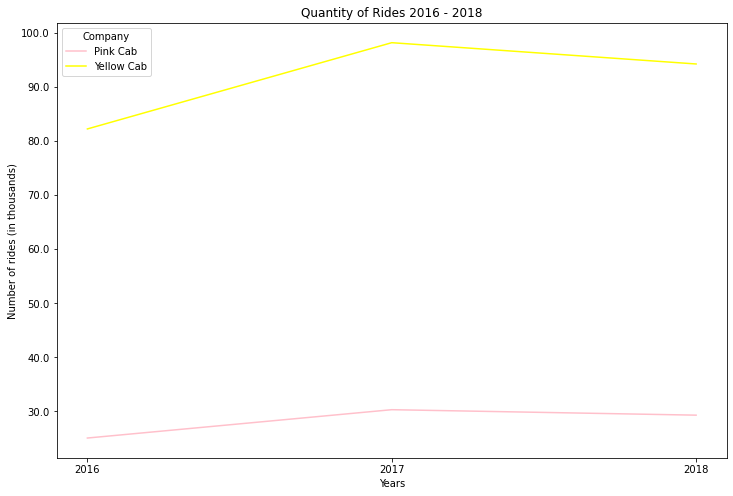

In [22]:
rides_df = data.groupby(['Company', data['Date of Travel'].dt.year])[['Customer ID']].count().reset_index()
display(rides_df)
ax = sns.lineplot(x = 'Date of Travel', y = 'Customer ID', data = rides_df, hue = 'Company', palette = ['pink','yellow'])

ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
ax.set_title('Quantity of Rides 2016 - 2018')
ax.set_ylabel('Number of rides (in thousands)')
ax.set_xlabel('Years')
ax.set_xticks(rides_df['Date of Travel'].unique())

In [23]:
rides_df = data.groupby(['Company'])[['Customer ID']].count().reset_index()
rides_df.columns = ['Company','Number of rides']
display(rides_df)
ratio = rides_df.iloc[1,1] / rides_df.iloc[0,1]
ratio

,Company,Number of rides
0,Pink Cab,84711
1,Yellow Cab,274681


3.2425659005323983

Yellow Cab has had **3.25** more trips than Pink Cab in the period from 2016 to 2018.

## Which company tend to retain more customers?

,Company,Year,Customer ID,Number of rides
0,Pink Cab,2016,1,1
1,Pink Cab,2016,2,2
2,Pink Cab,2016,3,2
3,Pink Cab,2016,5,2
4,Pink Cab,2016,6,1
...,...,...,...,...
134895,Yellow Cab,2018,59996,3
134896,Yellow Cab,2018,59997,4
134897,Yellow Cab,2018,59998,2
134898,Yellow Cab,2018,59999,4


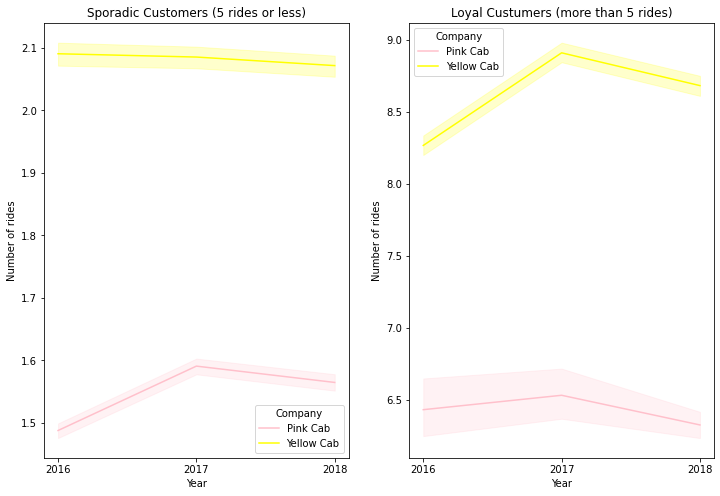

In [24]:
retention_df = data.groupby(['Company',data['Date of Travel'].dt.year,'Customer ID'])[['Payment_Mode']].count().reset_index()
retention_df.columns = ['Company','Year','Customer ID', 'Number of rides']
display(retention_df)

sporadic_customers = retention_df[retention_df['Number of rides'] <= 5]
loyal_customers = retention_df[retention_df['Number of rides'] > 5]

fig, ax = plt.subplots(1,2)

sns.lineplot(x = 'Year', y = 'Number of rides', data = sporadic_customers, hue = 'Company', palette = ['pink', 'yellow'], ax = ax[0])
sns.lineplot(x = 'Year', y = 'Number of rides', data = loyal_customers, hue = 'Company', palette = ['pink', 'yellow'], ax = ax[1])
ax[0].set_title('Sporadic Customers (5 rides or less)')
ax[1].set_title('Loyal Custumers (more than 5 rides)')
ax[0].set_xticks(sporadic_customers['Year'].unique())
ax[1].set_xticks(sporadic_customers['Year'].unique())

We categories the customers as sporadics and loyal based on the number of rides they take in each company every year (5 rides or less is consider a sporadic customer in our analysis), and we found that Yellow Cab is doing a better job than Pink Cab in customer retention.

## Recomendation

Based on the questions previously analyzed and answered, we can conclude that **Yellow Cab** is a better option to invest than Pink Cab.

**Profit through the years:** Yellow Cab has earned **8.3** times the earnings of Pink Cab in the period from 2016 to 2018.

**User income profile:** In each economic group (Poor or near-poor, Lower-middle class, Middle class, Upper-middle class, Rich) Yellow Cab has more users than Pink Cab.

**Users by city:** In the Top 5 cities with the largest number of users Yellow Cab has more presence than Pink Cab.

**Volume of rides:** Yellow Cab has had **3.25** more trips than Pink Cab in the period from 2016 to 2018.

**Customer retention:** We categories the customers as sporadics and loyal based on the number of rides they take in each company every year (5 rides or less is consider a sporadic customer in our analysis), and we found that Yellow Cab is doing a better job than Pink Cab in customer retention.